In [22]:
import cv2
import numpy as np
!pip install matplotlib
!pip install scipy
!pip install sklearn

In [ ]:
from IPython.display import Video

Video("Quan2_2m04s_164hr_36rr.mov")

In [23]:
from matplotlib import pyplot as plt

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('Quan2_2m04s_164hr_36rr.mov')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

# ROI selection
ret, frame = cap.read()
img = frame #cv2.resize(frame, (320, 320))
r = cv2.selectROI(img, fromCenter = False)
# Read until video is completed
R = []
G = []
B = []
count = 0
while(cap.isOpened() and count < 512):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    # Display the resulting frame
    img = frame #cv2.resize(frame, (320, 320))
    #cv2.imshow('Frame',img)
    
    imCrop = img[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2]), :]
    
    rCh = imCrop[:,:,0]
    gCh = imCrop[:,:,1]
    bCh = imCrop[:,:,2]
    
    R.append(np.mean(rCh))
    G.append(np.mean(gCh))
    B.append(np.mean(bCh))
    # Press Q on keyboard to  exit
    #if cv2.waitKey(25) & 0xFF == ord('q'):
    #  break
    count += 1
    
  # Break the loop
  else: 
    break
print(count)
# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()


512


R (mean, var):  118.08001745650184 12.10157551898677
G (mean, var):  124.14558776582214 7.903208360745847
B (mean, var):  162.26707958129833 5.452885275070875


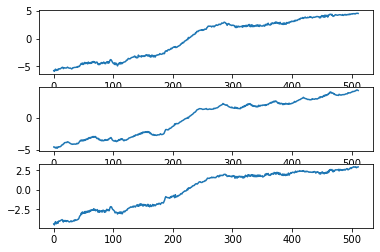

In [24]:
print('R (mean, var): ', np.mean(R), np.var(R))
print('G (mean, var): ', np.mean(G), np.var(G))
print('B (mean, var): ', np.mean(B), np.var(B))

nR = (R - np.mean(R)) #/np.var(R)
nG = (G - np.mean(G)) #/np.var(G)
nB = (B - np.mean(B)) #/np.var(B)

plt.figure()
plt.subplot(3,1,1)
plt.plot(nR)
plt.subplot(3,1,2)
plt.plot(nG)
plt.subplot(3,1,3)
plt.plot(nB)

In [25]:
from scipy import signal
from sklearn.decomposition import FastICA, PCA

# Compute ICA
ica = FastICA(n_components=3)
S  = np.c_[nR, nG, nB]
print(S.shape)
S_ = ica.fit_transform(S)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix


(512, 3)


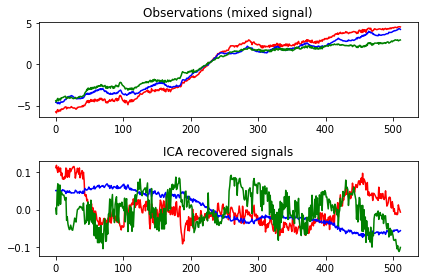

In [26]:
# Plot results

plt.figure()

models = [S, S_]
names = ['Observations (mixed signal)',
         'ICA recovered signals']
colors = ['red', 'blue', 'green']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(2, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

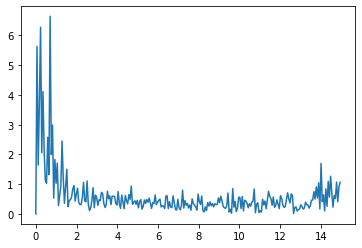

In [67]:
import scipy.fftpack

# Number of samples
N = 512
FPS = 30 
T = 1.0/30.0

sig = S_[:,2]
xf = FPS * (np.arange(int(N/2))/N)
yf = np.abs(np.fft.fft(sig))
yf = yf[range(int(int(N)/2))]

fig, ax = plt.subplots()
ax.plot(xf, yf)
plt.show()